

# Introduction to Pandas

![pandas Logo](https://github.com/pandas-dev/pandas/raw/master/web/pandas/static/img/pandas.svg "pandas Logo")

## Questions
1. What are the important pandas data structures?
1. How do I interact with these?
1. What else can pandas do for me?

In [37]:
import pandas as pd

## The pandas [`DataFrame`](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)...
... is a labeled, two dimensional columnal structure not unlike a table, spreadsheet, or the R `data.frame`.

![dataframe schematic](https://github.com/pandas-dev/pandas/raw/master/doc/source/_static/schemas/01_table_dataframe.svg "Schematic of a pandas DataFrame")

The `columns` that make up our `DataFrame` can be lists, dictionaries, NumPy arrays, pandas `Series`, or more. Within these `columns` our data can be any texts, numbers, dates and times, or many other data types you may have encountered in Python and NumPy. Shown here on the left in dark gray, our very first `column`  is uniquely referrred to as an `Index`, and this contains information characterizing each row of our `DataFrame`. Similar to any other `column`, the `index` can label our rows by text, numbers, `datetime`s (a popular one!), or more.

Let's take a look by reading in some `.csv` data [[ref](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/)].

In [38]:
df = pd.read_csv('data/enso_data.csv')

df

,datetime,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
0,1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1,1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
2,1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
3,1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
4,1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69
...,...,...,...,...,...,...,...,...,...
467,2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12
468,2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99
469,2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92
470,2021-03-01,26.48,-0.26,26.80,-0.39,27.79,-0.55,26.75,-0.51


In [39]:
df.index

RangeIndex(start=0, stop=472, step=1)

Our indexing column isn't particularly helpful currently. pandas is clever! A few optional keyword arguments later, and...

In [42]:
df = pd.read_csv('data/enso_data.csv', index_col=0, parse_dates=True)

df

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69
...,...,...,...,...,...,...,...,...
2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12
2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99
2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92


In [43]:
df.index

DatetimeIndex(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
               '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
               '1982-09-01', '1982-10-01',
               ...
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='datetime', length=472, freq=None)

... now we have our data helpfully organized by a proper `datetime`-like object. Each of our multiple columns of data can now be referenced by their date! This sneak preview at the pandas `DatetimeIndex` also unlocks for us much of pandas most useful time series functionality. Don't worry, we'll get there. What are the actual columns of data we've read in here?

In [44]:
df.columns

Index(['Nino12', 'Nino12anom', 'Nino3', 'Nino3anom', 'Nino4', 'Nino4anom',
       'Nino34', 'Nino34anom'],
      dtype='object')

## The pandas [`Series`](https://pandas.pydata.org/docs/user_guide/dsintro.html#series)...

... is essentially any one of the columns of our `DataFrame`, with its accompanying `Index`.

![pandas Series](https://github.com/pandas-dev/pandas/raw/master/doc/source/_static/schemas/01_table_series.svg "Schematic of a pandas Series")

The pandas `Series` is a fast and capable 1-dimensional list of nearly any data type we could want an array of, and it can behave very similarly to a NumPy `ndarray` or a Python `dict`. You can take a look at any of the `Series` that make up your `DataFrame` with its label and Python `dict`-like notation, as well as dot-shorthand:

In [45]:
df["Nino34"]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

In [46]:
df.Nino34

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

## Investigating the `DataFrame` and `Series`

Pandas has some helpful shorthand for quickly investigating our `DataFrame`.

In [47]:
df.head()

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69


In [48]:
df.tail()

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12
2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99
2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92
2021-03-01,26.48,-0.26,26.80,-0.39,27.79,-0.55,26.75,-0.51
2021-04-01,24.89,-0.80,26.96,-0.65,28.47,-0.21,27.40,-0.49


Let's take a look at a `Series` on its own. Recall selecting just one of our columns.

In [49]:
nino34_series = df["Nino34"]

nino34_series

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

`Series` can be indexed, selected, and subset as both `ndarray`-like,

In [51]:
nino34_series[14]

29.03

and `dict`-like,

In [52]:
nino34_series["1993-04-01"]

28.59

and these can be extended in both ways you might expect and ways you might not:

In [55]:
# numpy-like interval slices
nino34_series[::12]

datetime
1982-01-01    26.72
1983-01-01    29.36
1984-01-01    25.64
1985-01-01    25.43
1986-01-01    25.79
1987-01-01    27.91
1988-01-01    27.32
1989-01-01    24.53
1990-01-01    26.55
1991-01-01    27.01
1992-01-01    28.41
1993-01-01    26.69
1994-01-01    26.60
1995-01-01    27.55
1996-01-01    25.74
1997-01-01    25.96
1998-01-01    29.10
1999-01-01    24.90
2000-01-01    24.65
2001-01-01    25.74
2002-01-01    26.50
2003-01-01    27.76
2004-01-01    26.74
2005-01-01    27.10
2006-01-01    25.64
2007-01-01    27.26
2008-01-01    24.71
2009-01-01    25.54
2010-01-01    28.07
2011-01-01    24.93
2012-01-01    25.49
2013-01-01    26.16
2014-01-01    26.06
2015-01-01    27.10
2016-01-01    29.17
2017-01-01    26.25
2018-01-01    25.82
2019-01-01    27.08
2020-01-01    27.09
2021-01-01    25.58
Name: Nino34, dtype: float64

In [56]:
# label-based slicing
nino34_series["2000-12-01":"2002-04-01"]

datetime
2000-12-01    25.59
2001-01-01    25.74
2001-02-01    26.11
2001-03-01    26.84
2001-04-01    27.52
2001-05-01    27.60
2001-06-01    27.68
2001-07-01    27.32
2001-08-01    26.87
2001-09-01    26.55
2001-10-01    26.59
2001-11-01    26.45
2001-12-01    26.17
2002-01-01    26.50
2002-02-01    26.95
2002-03-01    27.32
2002-04-01    27.94
Name: Nino34, dtype: float64

## The Powers of Pandas

### Quick Plots of Your Data

<AxesSubplot:xlabel='datetime'>

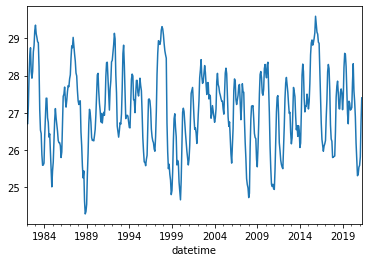

In [58]:
df.Nino34.plot()

### Calculations

In [59]:
df.describe()

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,23.209619,0.059725,25.936568,0.039428,28.625064,0.063814,27.076780,0.034894
std,2.431522,1.157590,1.349621,0.965464,0.755422,0.709401,1.063004,0.947936
min,18.570000,-2.100000,23.030000,-2.070000,26.430000,-1.870000,24.270000,-2.380000
25%,21.152500,-0.712500,24.850000,-0.600000,28.140000,-0.430000,26.330000,-0.572500
50%,22.980000,-0.160000,25.885000,-0.115000,28.760000,0.205000,27.100000,0.015000
75%,25.322500,0.515000,26.962500,0.512500,29.190000,0.630000,27.792500,0.565000
max,29.150000,4.620000,29.140000,3.620000,30.300000,1.670000,29.600000,2.950000


In [60]:
df.mean()

Nino12        23.209619
Nino12anom     0.059725
Nino3         25.936568
Nino3anom      0.039428
Nino4         28.625064
Nino4anom      0.063814
Nino34        27.076780
Nino34anom     0.034894
dtype: float64

In [61]:
df.Nino34.mean()

27.07677966101695

Other Plots

<AxesSubplot:ylabel='Frequency'>

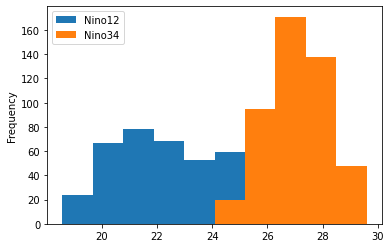

In [62]:
df[['Nino12', 'Nino34']].plot.hist()

<AxesSubplot:>

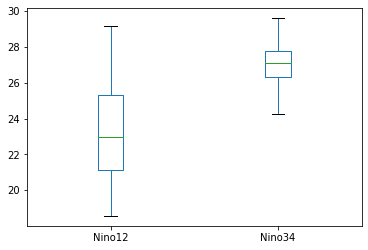

In [63]:
df[['Nino12', 'Nino34']].plot.box()

For more examples of plotting choices, check out [the pandas plot documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Advanced subsetting

In [66]:
# Uses the datetime column
df[df.index.month == 1]

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1983-01-01,27.42,2.96,28.92,3.29,29.00,0.70,29.36,2.79
1984-01-01,24.18,-0.28,24.82,-0.81,27.64,-0.66,25.64,-0.93
1985-01-01,23.59,-0.87,24.51,-1.12,27.71,-0.59,25.43,-1.14
1986-01-01,24.61,0.15,24.73,-0.90,28.11,-0.19,25.79,-0.78
1987-01-01,25.30,0.84,26.69,1.06,29.02,0.72,27.91,1.34
1988-01-01,24.64,0.18,26.12,0.49,29.13,0.83,27.32,0.75
1989-01-01,24.09,-0.37,24.15,-1.48,26.54,-1.76,24.53,-2.04
1990-01-01,24.02,-0.44,25.34,-0.29,28.56,0.26,26.55,-0.02


In [23]:
df.loc[df.index.year == 1995]

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1995-01-01,25.33,0.87,26.34,0.71,29.20,0.90,27.55,0.98
1995-02-01,26.43,0.36,26.87,0.50,29.01,0.91,27.45,0.73
1995-03-01,26.12,-0.40,27.08,-0.06,28.96,0.77,27.63,0.41
1995-04-01,24.47,-1.00,27.10,-0.40,28.89,0.39,27.93,0.15
1995-05-01,23.10,-1.10,26.40,-0.68,29.15,0.36,27.73,-0.12
1995-06-01,22.45,-0.37,26.20,-0.23,29.01,0.17,27.59,-0.06
1995-07-01,21.23,-0.37,25.42,-0.20,28.78,-0.02,27.01,-0.21
1995-08-01,20.01,-0.64,24.33,-0.66,28.43,-0.25,26.33,-0.49
1995-09-01,20.17,-0.19,24.02,-0.83,28.25,-0.44,25.96,-0.76


In [67]:
df[df.Nino34anom > 2]

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-11-01,24.59,3.00,27.62,2.64,29.23,0.60,28.81,2.16
1982-12-01,26.13,3.34,28.39,3.25,29.15,0.66,29.21,2.64
1983-01-01,27.42,2.96,28.92,3.29,29.00,0.70,29.36,2.79
1983-02-01,28.09,2.02,28.92,2.55,28.79,0.69,29.13,2.41
1997-08-01,24.80,4.15,27.84,2.85,29.26,0.58,28.84,2.02
1997-09-01,24.40,4.04,27.84,2.99,29.32,0.63,28.93,2.21
1997-10-01,24.58,3.76,28.17,3.25,29.32,0.66,29.23,2.54
1997-11-01,25.63,4.04,28.55,3.57,29.49,0.86,29.32,2.67
1997-12-01,26.92,4.13,28.76,3.62,29.32,0.83,29.26,2.69


In [68]:
nino_temp_cols = ['Nino12', 'Nino3', 'Nino4', 'Nino34']
nino_anom_cols = ['Nino12anom', 'Nino3anom', 'Nino4anom', 'Nino34anom']

<AxesSubplot:xlabel='datetime'>

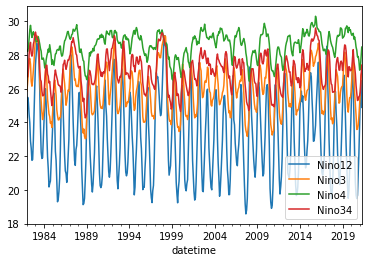

In [69]:
df[nino_temp_cols].plot()

<AxesSubplot:xlabel='datetime'>

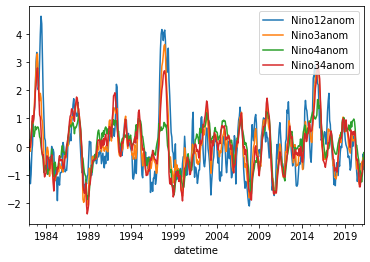

In [70]:
df[nino_anom_cols].plot()

### Resampling

<AxesSubplot:xlabel='datetime'>

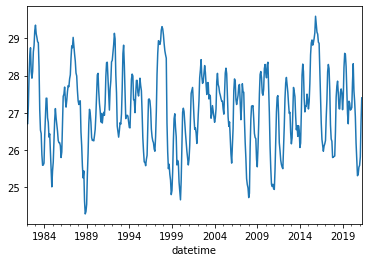

In [74]:
df.Nino34.plot()

<AxesSubplot:xlabel='datetime'>

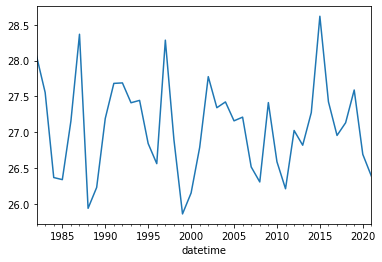

In [72]:
df.Nino34.resample('1Y').mean().plot()

<AxesSubplot:xlabel='datetime'>

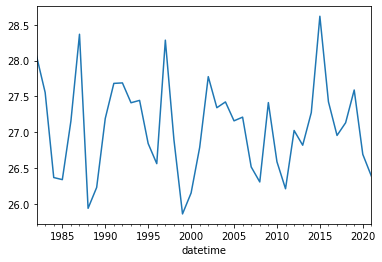

In [29]:
df.Nino34.resample('1Y').mean().plot()

In [30]:
def convert_degc_to_kelvin(temperature_degc):
    """
    Converts from degrees celsius to Kelvin
    """
    
    return temperature_degc + 273.15

In [75]:
# Convert a single value
convert_degc_to_kelvin(0)

273.15

In [76]:
nino_34 = df.Nino34

In [77]:
nino_34

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

In [97]:
type(df.Nino12.values[0:10])

numpy.ndarray

In [99]:
type(df.Nino12[0:10])

pandas.core.series.Series

In [89]:
convert_degc_to_kelvin(nino_34)

datetime
1982-01-01    299.87
1982-02-01    299.85
1982-03-01    300.35
1982-04-01    301.17
1982-05-01    301.69
               ...  
2020-12-01    298.68
2021-01-01    298.73
2021-02-01    298.96
2021-03-01    299.90
2021-04-01    300.55
Name: Nino34, Length: 472, dtype: float64

In [90]:
df['Nino34_degK'] = convert_degc_to_kelvin(nino_34)

In [91]:
df.Nino34_degK

datetime
1982-01-01    299.87
1982-02-01    299.85
1982-03-01    300.35
1982-04-01    301.17
1982-05-01    301.69
               ...  
2020-12-01    298.68
2021-01-01    298.73
2021-02-01    298.96
2021-03-01    299.90
2021-04-01    300.55
Name: Nino34_degK, Length: 472, dtype: float64

<AxesSubplot:xlabel='datetime'>

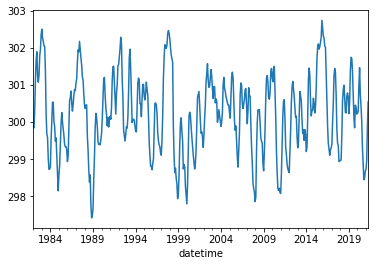

In [83]:
df.Nino34_degF.plot()

In [84]:
df.to_csv('nino_analyzed_output.csv')

In [86]:
pd.read_csv('nino_analyzed_output.csv', index_col=0, parse_dates=True)

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom,Nino34_degF,Nino34_degK
datetime,,,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15,299.87,299.87
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02,299.85,299.85
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02,300.35,300.35
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24,301.17,301.17
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69,301.69,301.69
...,...,...,...,...,...,...,...,...,...,...
2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12,298.68,298.68
2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99,298.73,298.73
2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92,298.96,298.96
